В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

# Задание 1 

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

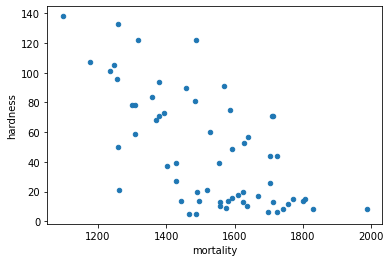

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('water.csv')

#Построить точечный график
df.plot(kind='scatter', x='mortality', y='hardness')

In [78]:
#Рассчитать коэффициенты корреляции Пирсона
df[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [3]:
#Рассчитать коэффициенты корреляции Спирмена
df[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Вывод: Корреляция отрицательная, это значит что при увеличении жёсткости, снижается смертность. Скорее всего мягкость воды приводит к недостатоку микроэлементов и минералов в организме и в долгосрочной перспективе к смерти.

In [4]:
#Построить модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [99]:
X = df[['mortality']]
y = df['hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [100]:
X_train.shape

(42, 1)

In [101]:
y_train.shape

(42,)

In [102]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

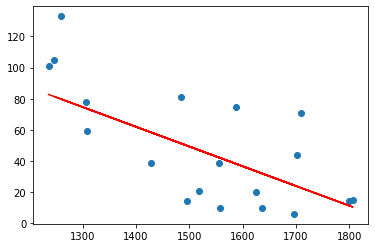

In [103]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [104]:
#Рассчитать коэффициент детерминации
model.score(X_test, y_test)

0.4948982822876836

Вывод: Коэффициент детерминации 0,49 - модель неидеальна, но жизнеспособна.

In [ ]:
#Вывести график остатков

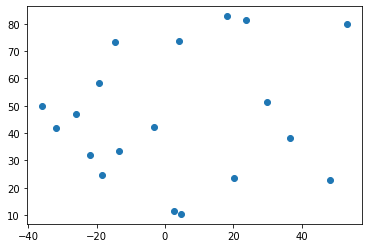

In [215]:
res = y_test - y_pred
plt.scatter(res,y_pred)

(array([2., 4., 2., 1., 3., 0., 3., 1., 1., 2.]),
 array([-35.94833006, -27.03849761, -18.12866517,  -9.21883273,
         -0.30900028,   8.60083216,  17.51066461,  26.42049705,
         35.33032949,  44.24016194,  53.14999438]),
 <BarContainer object of 10 artists>)

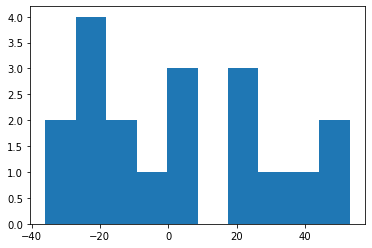

In [214]:
plt.hist(res)

# Задание 2

In [ ]:
#Разделить данные на 2 группы
#Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [29]:
df_s = df[df.location == 'South']
df_n = df[df.location == 'North']

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

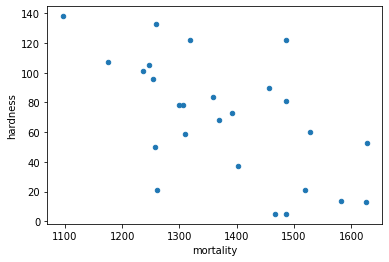

In [30]:
#Построить точечный график South
df_s.plot(kind='scatter', x='mortality', y='hardness')

In [32]:
#Рассчитать коэффициенты корреляции Пирсона South
df_s[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [34]:
#Рассчитать коэффициенты корреляции Спирмена South
df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

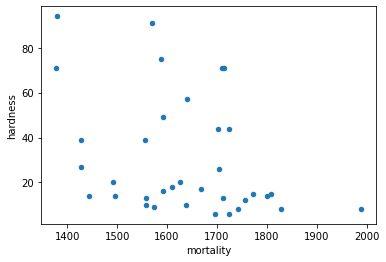

In [38]:
#Построить точечный график North
df_n.plot(kind='scatter', x='mortality', y='hardness')

In [39]:
#Рассчитать коэффициенты корреляции Пирсона North
df_n[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [40]:
#Рассчитать коэффициенты корреляции Спирмена North
df_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Вывод: Корреляция у Южных городов между смертностью и жесткостью сильнее, по сравнению с Северными городами (там она почти отсутствет). Корелляция в обоих случаях больше 0,3 - связь умеренная.

In [88]:
#Построить модель линейной регрессии South
Xs = df_s[['mortality']]
ys = df_s['hardness']
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size=0.40, random_state=42)

In [89]:
Xs_train.shape

(10, 1)

In [90]:
ys_train.shape

(10,)

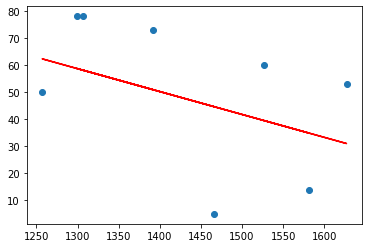

In [91]:
models = LinearRegression()
models.fit(Xs_train, ys_train)
ys_pred = models.predict(Xs_test)
plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')

In [92]:
#Рассчитать коэффициент детерминации South
models.score(Xs_test, ys_test)

0.21587672230551824

Вывод: Выборка данных достаточно маленькая, коэффициент детерминации 0,2 - модель получилась некачественная, точность подбора уравнением регресси - низкая.

In [82]:
df['location'].value_counts()

North    35
South    26
Name: location, dtype: int64

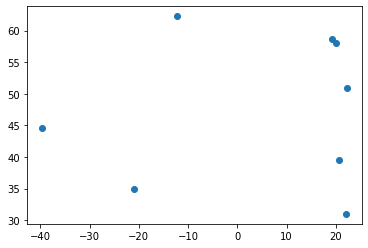

In [216]:
ress = ys_test - ys_pred
plt.scatter(ress,ys_pred)

(array([1., 0., 0., 1., 1., 0., 0., 0., 0., 5.]),
 array([-39.60354509, -33.42902628, -27.25450747, -21.07998866,
        -14.90546984,  -8.73095103,  -2.55643222,   3.61808659,
          9.79260541,  15.96712422,  22.14164303]),
 <BarContainer object of 10 artists>)

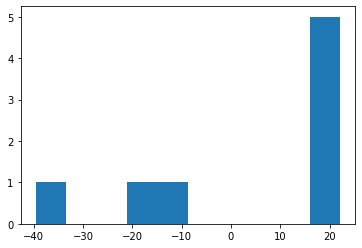

In [217]:
plt.hist(ress)

In [197]:
#Построить модель линейной регрессии North
Xn = df_n[['mortality']]
yn = df_n['hardness']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.20, random_state=42)

In [198]:
Xn_train.shape

(28, 1)

In [199]:
yn_train.shape

(28,)

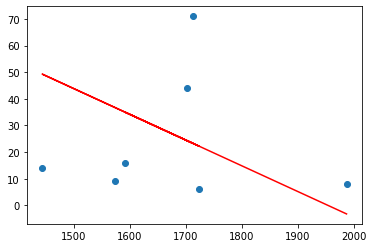

In [200]:
modeln = LinearRegression()
modeln.fit(Xn_train, yn_train)
yn_pred = modeln.predict(Xn_test)
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')

In [201]:
#Рассчитать коэффициент детерминации North
modeln.score(Xn_test, yn_test)

-0.5174330384125665

Вывод: Так как корреляция по Северу низкая (0,3 - 0,4) и выборка достаточно маленькая, получилась нежизнеспособная модель, линейная зависимость между величинами отсутствует.

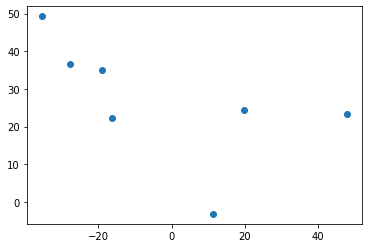

In [218]:
resn = yn_test - yn_pred
plt.scatter(resn,yn_pred)

(array([2., 1., 1., 0., 0., 1., 1., 0., 0., 1.]),
 array([-35.29255959, -26.9922889 , -18.69201821, -10.39174752,
         -2.09147683,   6.20879386,  14.50906455,  22.80933524,
         31.10960592,  39.40987661,  47.7101473 ]),
 <BarContainer object of 10 artists>)

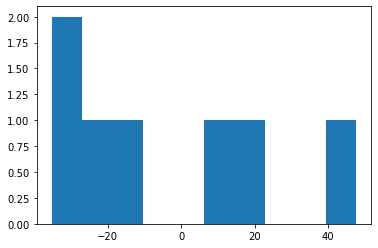

In [219]:
plt.hist(resn)